In [187]:
#!pip install nltk
#!pip install sklearn
#!pip install wordcloud

In [188]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [189]:
get_tokens_list = lambda x: literal_eval(x) if type(x) == str else []

nltk.download('popular')

link = "./rotten_tomatoes_critic_reviews_tokens.csv"
link2 ='./rotten_tomatoes_movies.csv'

critic_reviews = pd.read_csv(link, converters={'review_date': pd.to_datetime})
movies = pd.read_csv(link2, converters={'original_release_date': pd.to_datetime, 'streaming_release_date': pd.to_datetime})

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package movie_reviews is already

# Analyse with NLKT the consens comment

In [190]:
movies['critics_consensus'].fillna(" ", inplace=True)
movies['critics_consensus'].isna().sum()
stop_words = nltk.corpus.stopwords.words("english") + ['"', "'", "'s", "-", "_",",","--",".", "of", "the"]

In [191]:
# Get freq words from critics consensus
movies["X"] = movies[~movies['critics_consensus'].isna()]['critics_consensus'].apply(lambda sentence: [w.lower() for w in nltk.word_tokenize(sentence)])
freq = nltk.FreqDist(movies[~movies["X"].isna()]["X"].sum())

In [192]:
# Get freq clean words from critics consensus
movies["X_clean"] = movies[~movies["X"].isna()]["X"].apply(lambda tokens: \
                  [ w for w in tokens if w.lower() not in stop_words ])
freq_clean = nltk.FreqDist(movies[~movies["X"].isna()]["X_clean"].sum())

In [193]:
df_tokens = pd.DataFrame.from_dict(freq, orient='index')
df_tokens.columns = ['Frequency']
df_tokens.index.name = 'Term'

In [194]:
df_words = pd.DataFrame.from_dict(freq_clean, orient='index')
df_words.columns = ['Frequency']
df_words.index.name = 'Term'

In [195]:
porter = PorterStemmer()
movies["X_stem"] = movies[~movies["X_clean"].isna()]["X_clean"].apply(lambda words: [porter.stem(word.lower()) for word in words] )
# change to dataFrame to see better final results
df_stem = pd.DataFrame.from_dict(nltk.FreqDist(movies[~movies["X_stem"].isna()]["X_stem"].sum()), orient='index')
df_stem.columns = ['Frequency']
df_stem.index.name = 'Term'

In [196]:
wnl = WordNetLemmatizer()
movies["X_lem"] = movies[~movies["X_clean"].isna()]["X_clean"].apply(lambda words: [wnl.lemmatize(word.lower()) for word in words] )
df_lem = pd.DataFrame.from_dict(nltk.FreqDist(movies[~movies["X_lem"].isna()]["X_lem"].sum()), orient='index')
df_lem.columns = ['Frequency']
df_lem.index.name = 'Term'

[Text(0.5, 1.0, 'Lemmatized text')]

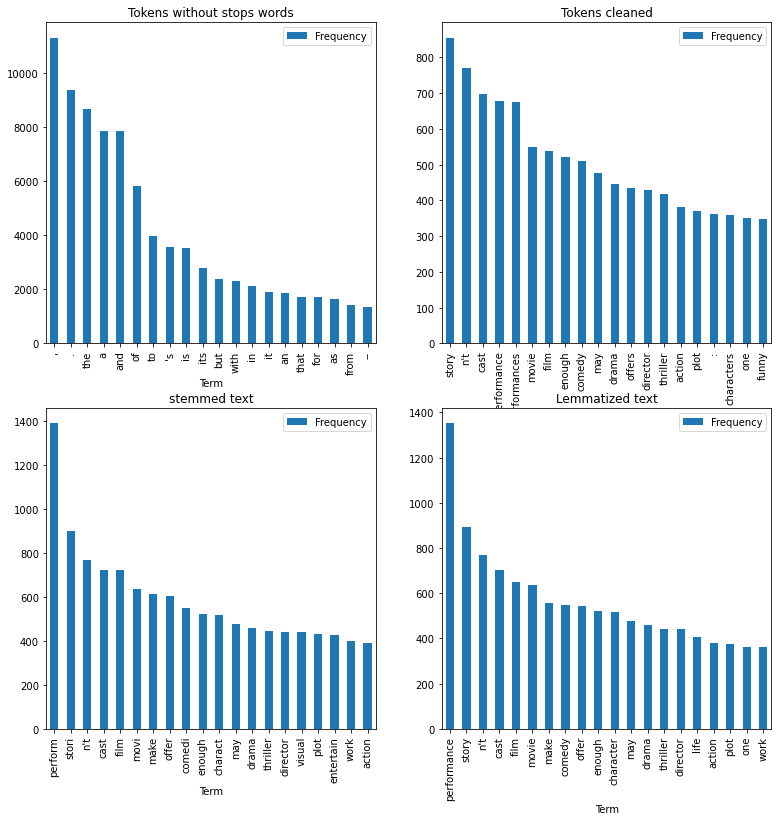

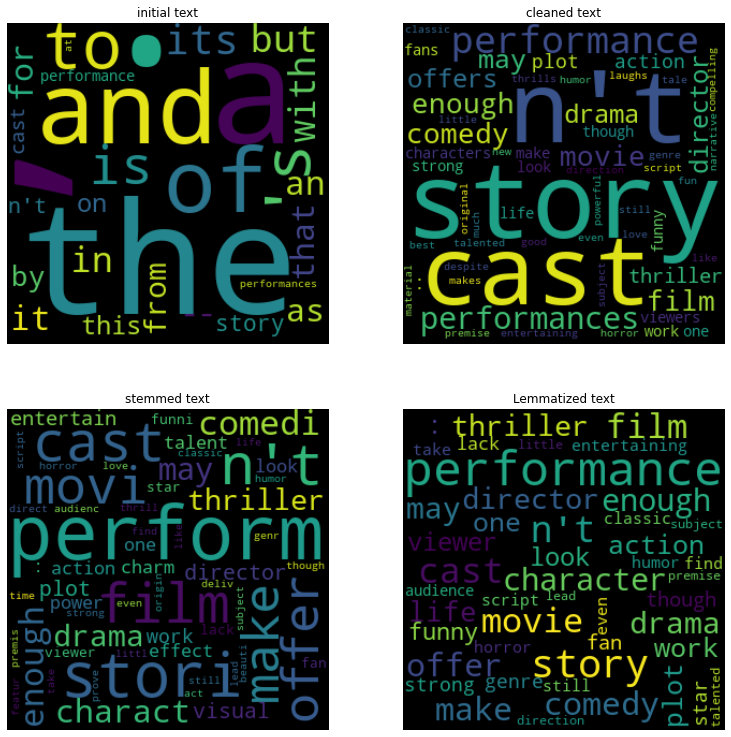

In [197]:
fig = plt.subplots(figsize=(13,13))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

#initial text
df_tokens.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax1)
ax1.set(title="Tokens without stops words")

#after cleaning up stopwords and punctuation
df_words.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax2)
ax2.set(title="Tokens cleaned")

#cleaning up stopwords and punctuation + stemmer
df_stem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax= ax3)
ax3.set(title="stemmed text")

#after cleaning up stopwords and punctuation + lemmatizer.
df_lem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax= ax4)
ax4.set(title="Lemmatized text")

fig = plt.subplots(figsize=(13,13))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

#initial text
wordcloud1 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud1.generate_from_frequencies(freq)

ax1.imshow(wordcloud1, interpolation="bilinear")
ax1.axis('off')
ax1.set(title="initial text")
plt.margins(x=0, y=0)

#after cleaning up stopwords and punctuation
wordcloud2 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud2.generate_from_frequencies(freq_clean)

ax2.imshow(wordcloud2, interpolation="bilinear")
ax2.axis('off')
ax2.set(title="cleaned text")

#cleaning up stopwords and punctuation + stemmer
wordcloud3 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud3.generate_from_frequencies(nltk.FreqDist(movies[~movies["X_stem"].isna()]["X_stem"].sum()))

ax3.imshow(wordcloud3, interpolation="bilinear")
ax3.axis('off')
ax3.set(title="stemmed text")

#after cleaning up stopwords and punctuation + lemmatizer.
wordcloud4 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud4.generate_from_frequencies(nltk.FreqDist(movies[~movies["X_lem"].isna()]["X_lem"].sum()))

ax4.imshow(wordcloud4, interpolation="bilinear")
ax4.axis('off')
ax4.set(title="Lemmatized text")

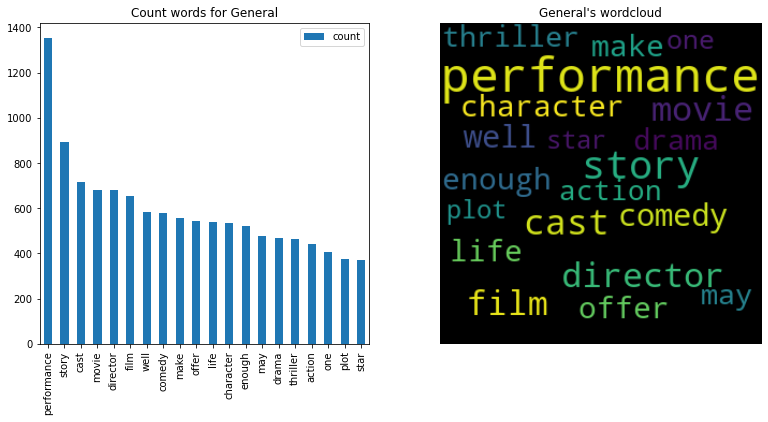

In [198]:
# Create a matrix with vectorise & TF - IDF of any alpha word longer than 2 caracters
def get_count(X, name = "", max_features=20):
    
    vectorizer = CountVectorizer(max_features=max_features, stop_words=stop_words )
    text_matrix = vectorizer.fit_transform(X)

    df_matrix_neg = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    df_sum_matrix_neg = pd.DataFrame(df_matrix_neg.sum().sort_values(ascending=False), columns = ["count"])
    
    
    fig = plt.subplots(figsize=(13,13))

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    ax1.set(title=f"Count words for {name}")
    df_sum_matrix_neg.plot(kind="bar", ax = ax1)

    #initial text
    wordcloud_neg = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
    wordcloud_neg.generate_from_frequencies(df_matrix_neg.sum())

    ax2.imshow(wordcloud_neg, interpolation="bilinear")
    ax2.axis('off')
    ax2.set(title=f"{name}'s wordcloud")
    plt.margins(x=0, y=0)    

X = movies[~movies["X_lem"].isna()]["X_lem"].apply(lambda wlist: " ".join(wlist))

get_count(X, name = "General")

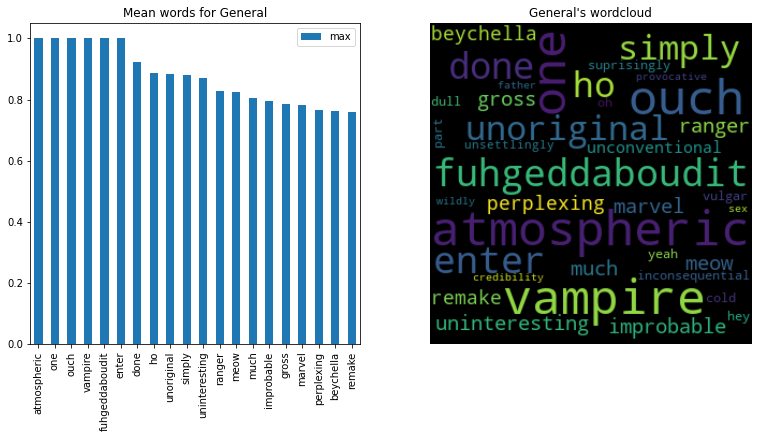

In [199]:
def get_tfidf(X, name = ""):
    tfidf = TfidfVectorizer(token_pattern = "[a-zA-Z]+", stop_words=stop_words)

    #tfidf.fit(X.values)
    text_matrix_tfidf = tfidf.fit_transform(X)
    
    #return text_matrix_tfidf.toarray().shape
    
    df_matrix_tf_idf = pd.DataFrame(text_matrix_tfidf.toarray(), columns = tfidf.get_feature_names_out())
    df_max_tf_idf = pd.DataFrame(df_matrix_tf_idf.max(), columns = ["max"])
    fig = plt.subplots(figsize=(13,13))

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    wordcloud = WordCloud(width=300, height=300, max_font_size=50, min_font_size=10)
    wordcloud.generate_from_frequencies(df_matrix_tf_idf.max().sort_values(ascending=False).head(40))

    ax2.imshow(wordcloud, interpolation="bilinear")
    ax2.axis('off')
    plt.margins(x=0, y=0)

    df_max_tf_idf.sort_values("max", ascending=False).head(20).plot(kind="bar", ax = ax1)
    
    ax1.set(title=f"Mean words for {name}")
    ax2.set(title=f"{name}'s wordcloud")
    
X = movies["X_lem"].apply(lambda wlist: " ".join(wlist))
get_tfidf(X, name = "General")


# Most frequent words depend of tomatometer status


In [200]:
#X = movies[(~movies["X_lem"] movies['tomatometer_status'] == "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))    
#get_count(X, "Rotten")

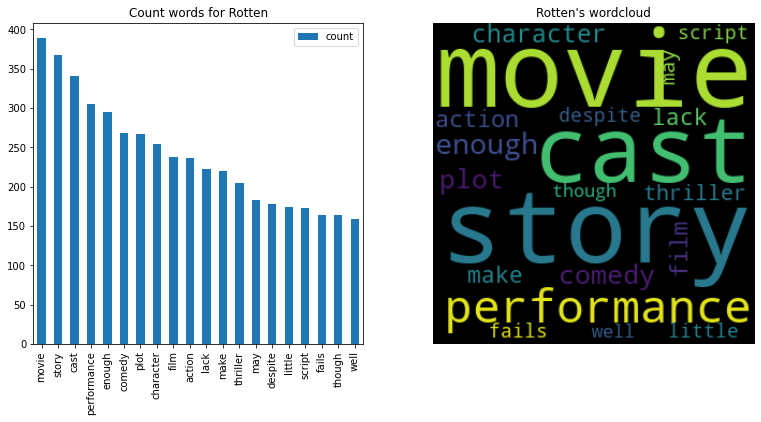

In [201]:
X = movies[(~movies["X_lem"].isna()) & (movies['tomatometer_status'] == "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))    
get_count(X, "Rotten")
#get_tfidf(X, name = "Rotten")

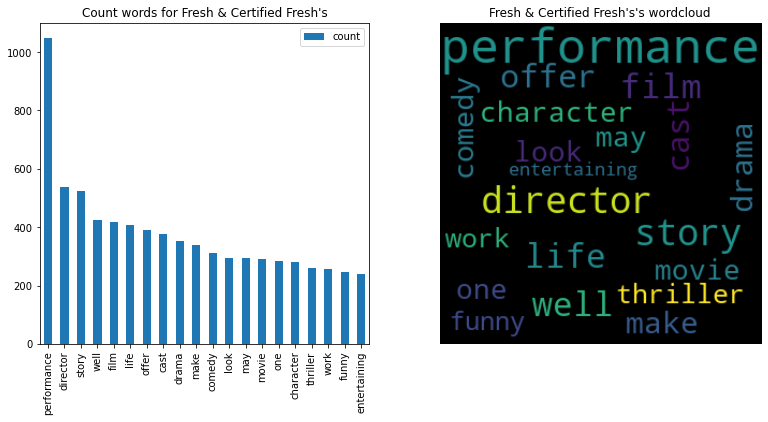

In [202]:
X = movies[(~movies["X_lem"].isna()) & (movies['tomatometer_status'] != "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))
get_count(X, "Fresh & Certified Fresh's")
#get_tfidf(X, "Fresh & Certified Fresh's")

# Count & TF IDF per genre

/var/folders/ts/l4jvqvn135g1lpkckf7t5cmc0000gn/T/ipykernel_2761/1794811837.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize=(13,13))


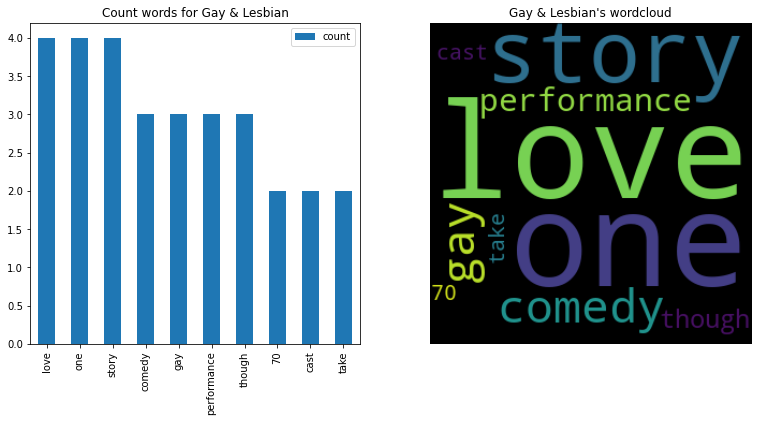

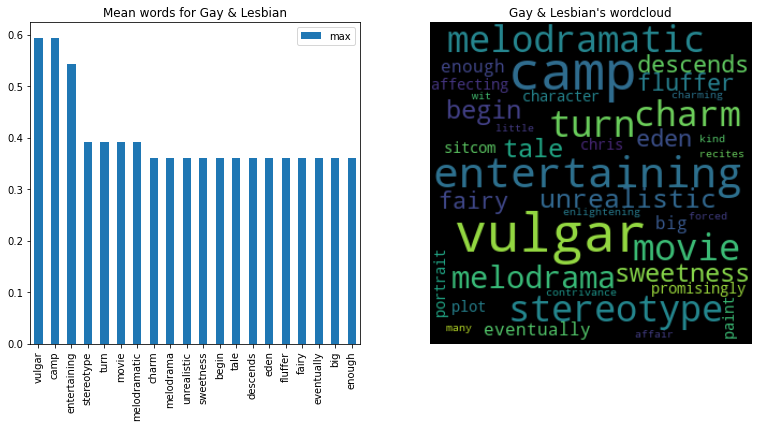

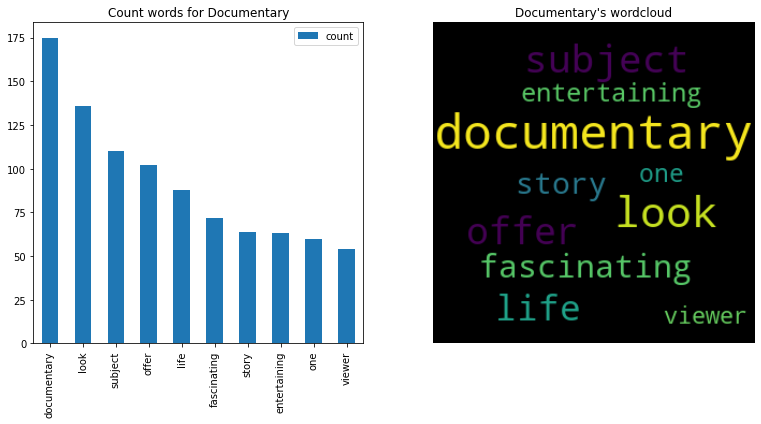

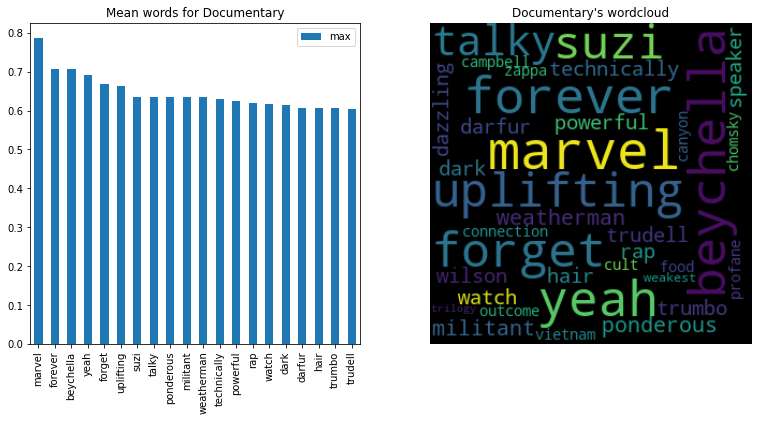

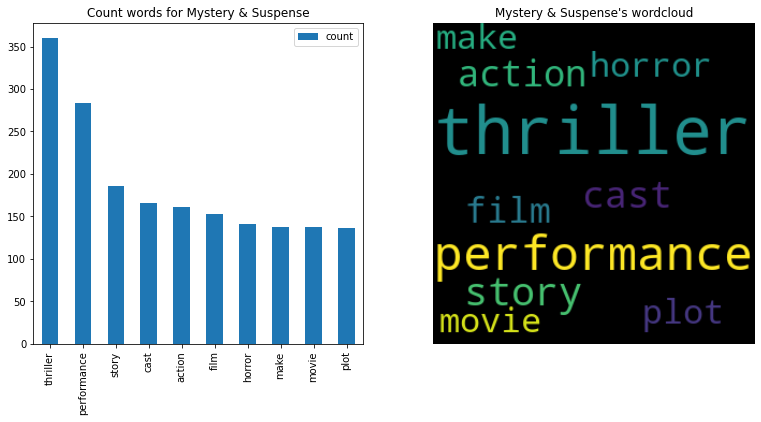

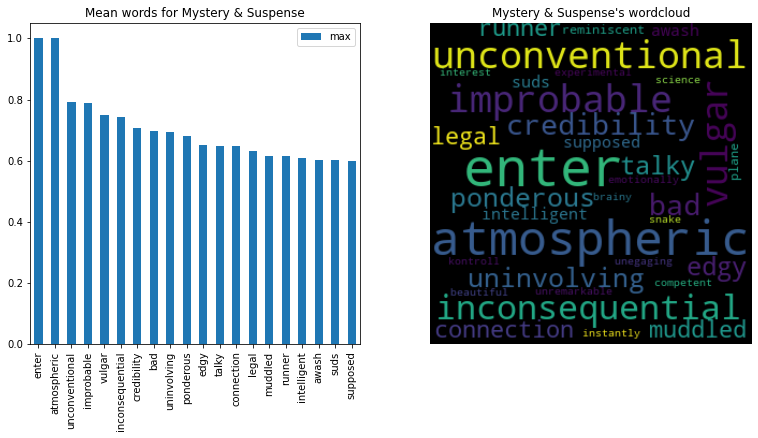

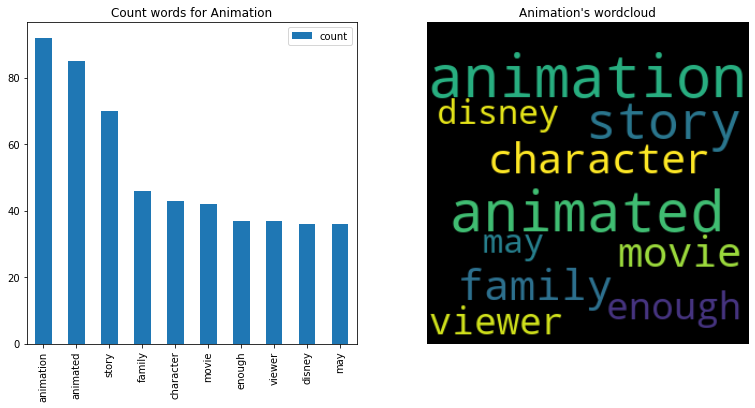

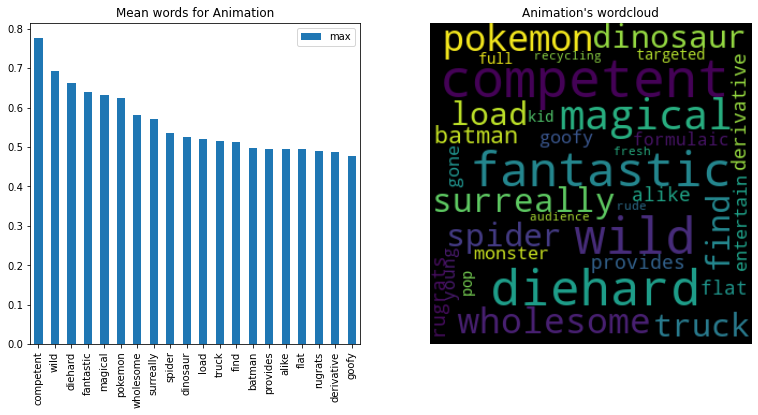

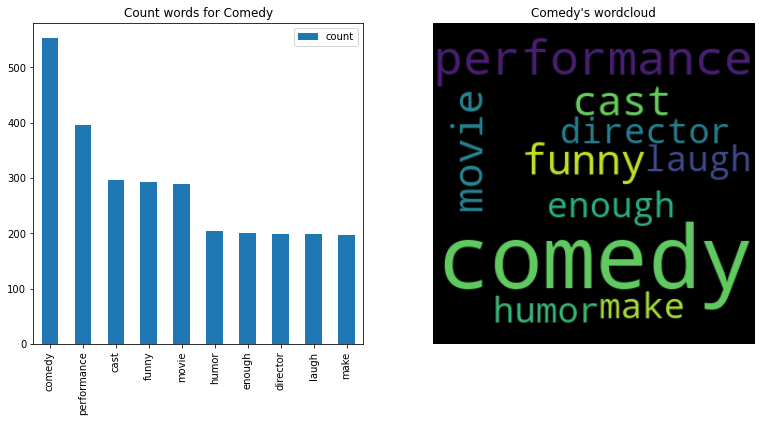

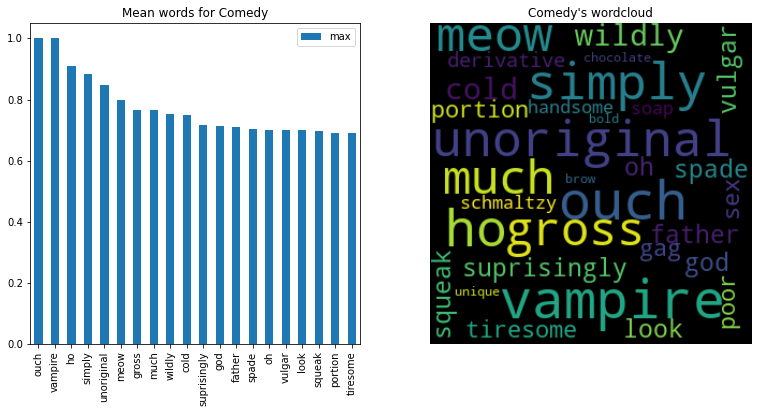

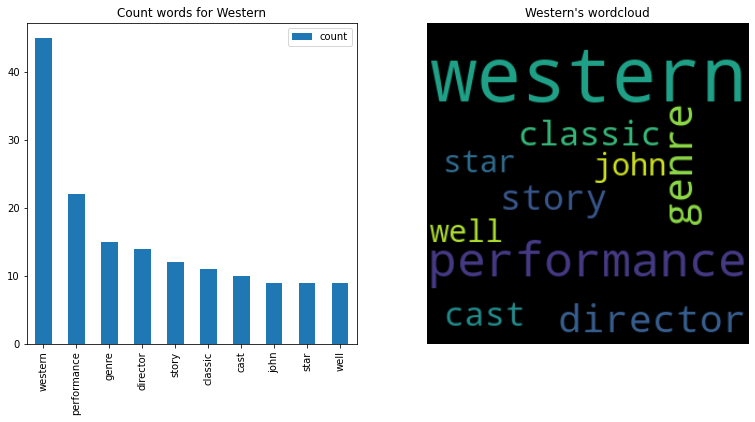

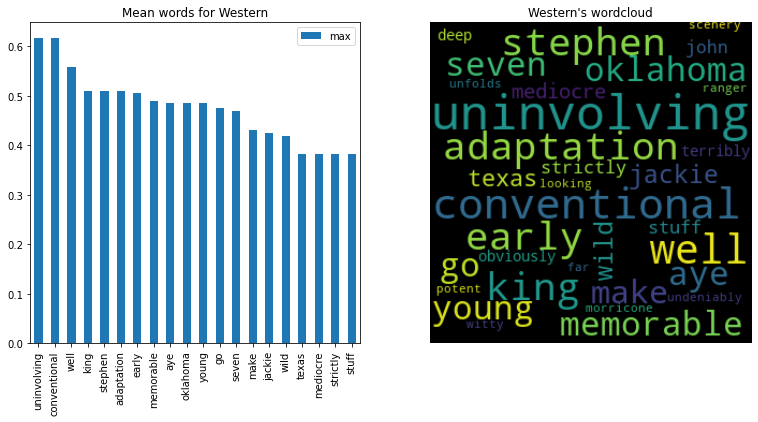

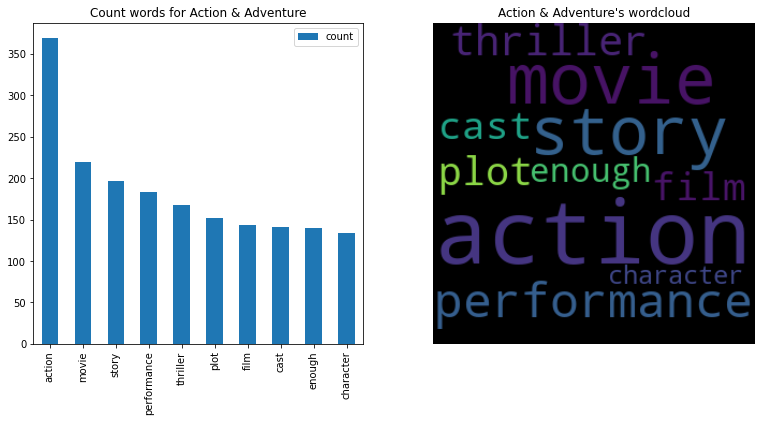

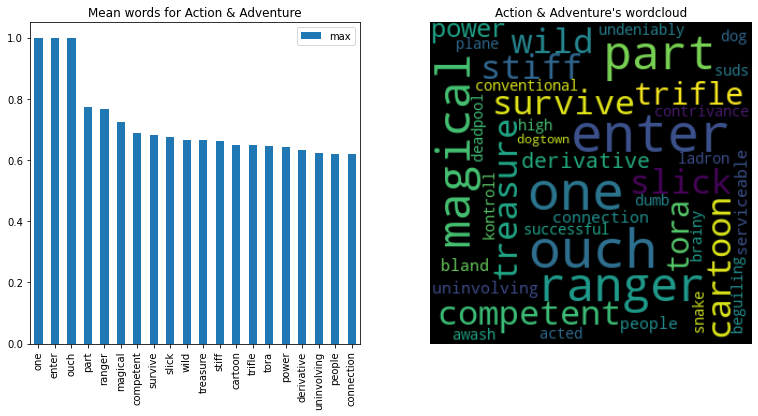

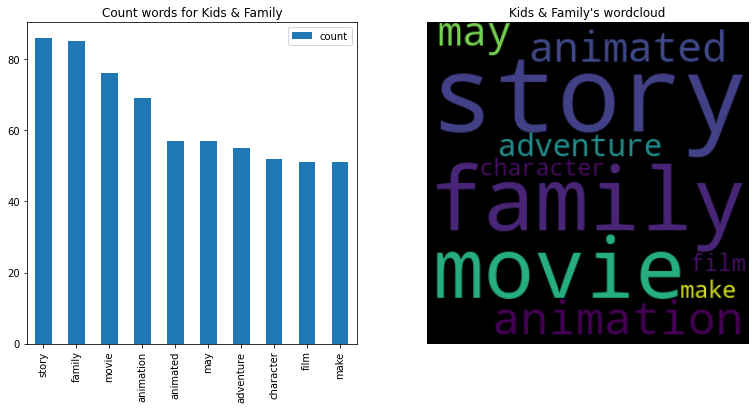

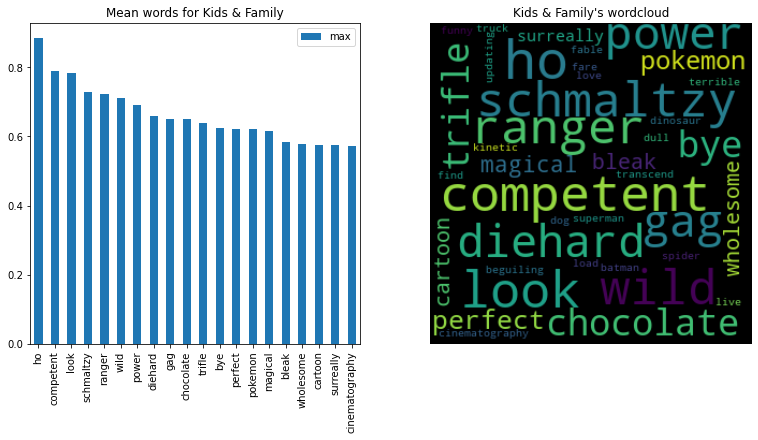

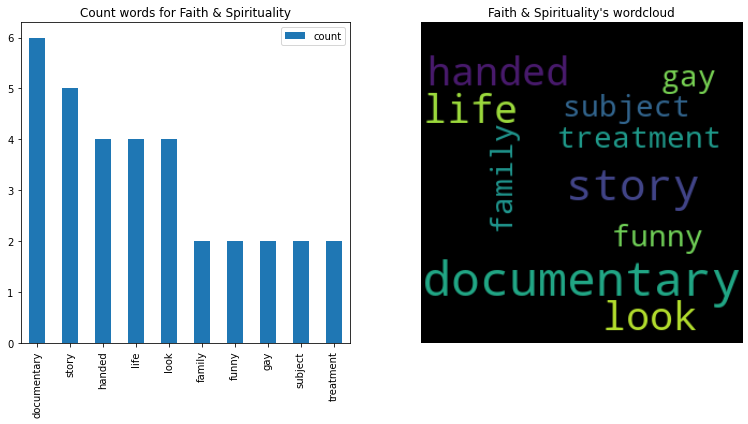

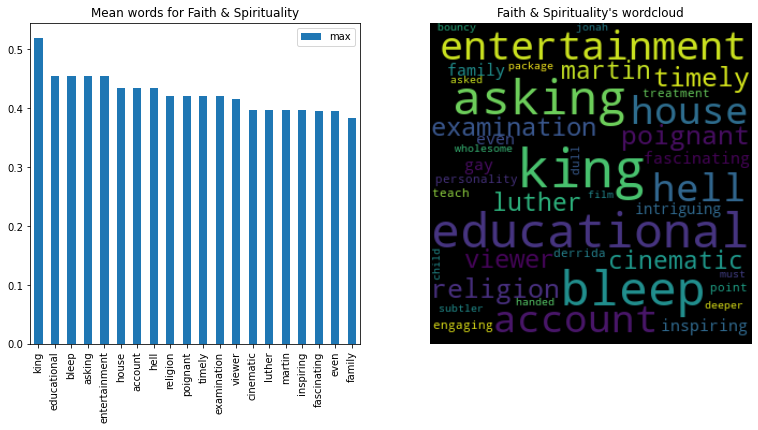

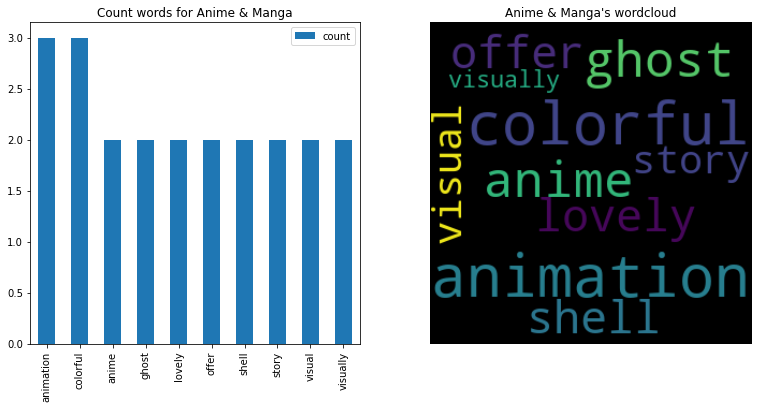

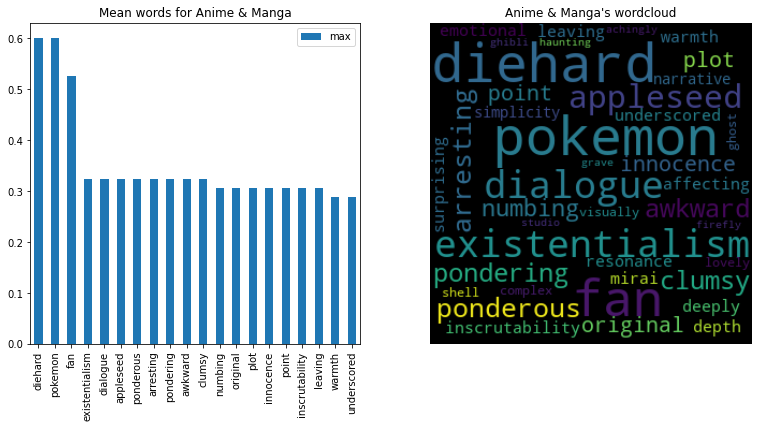

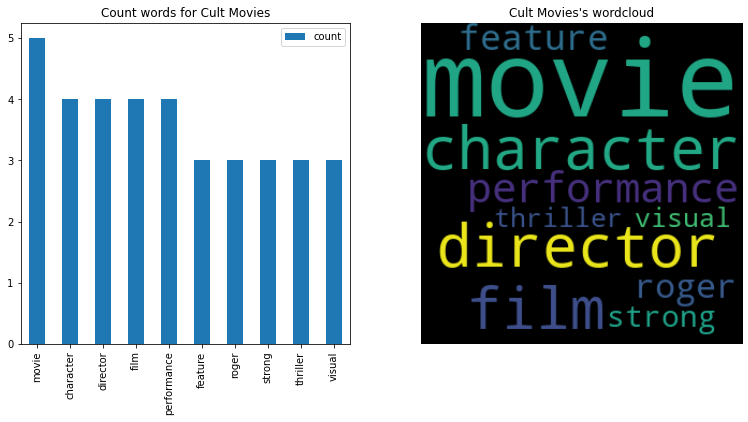

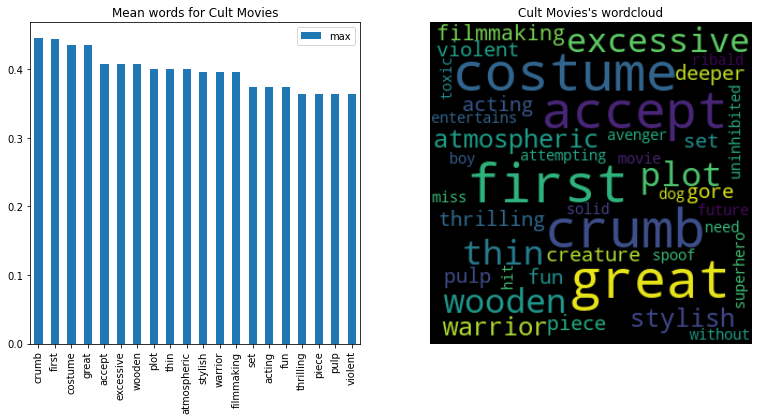

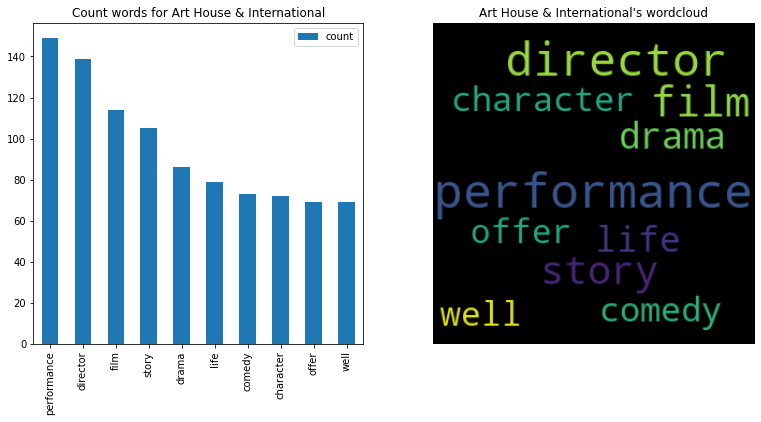

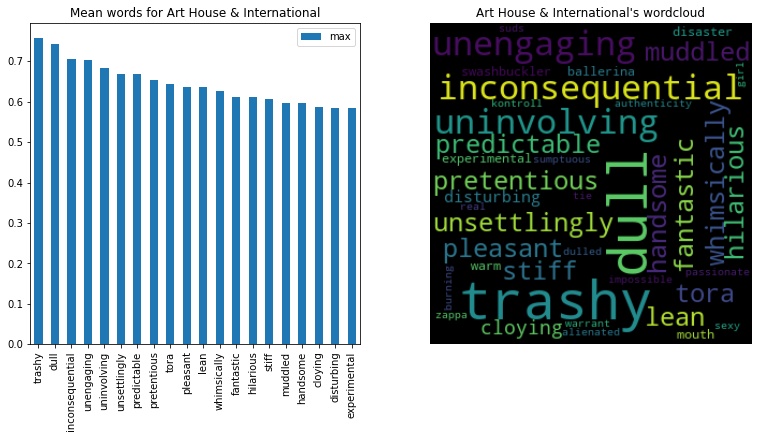

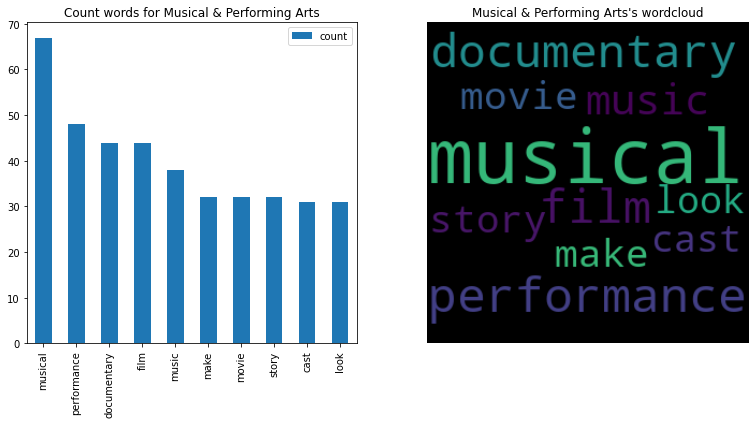

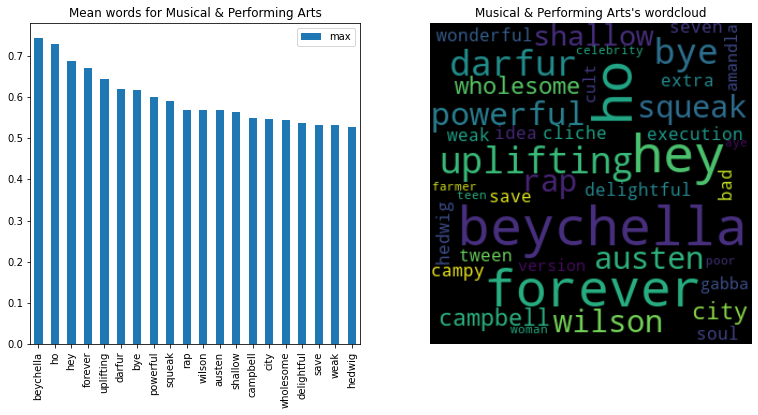

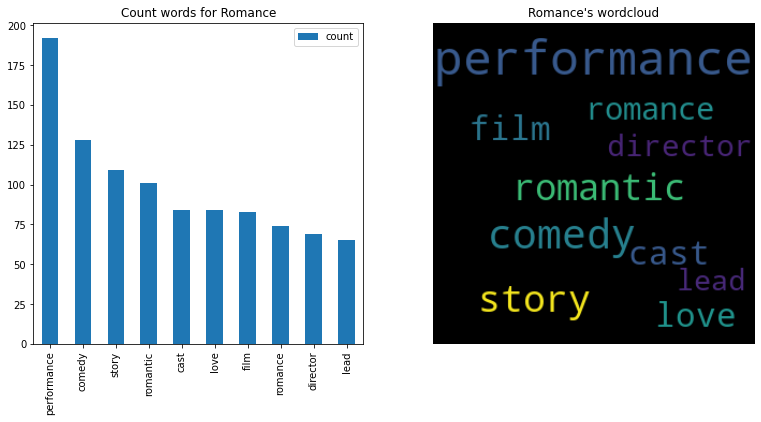

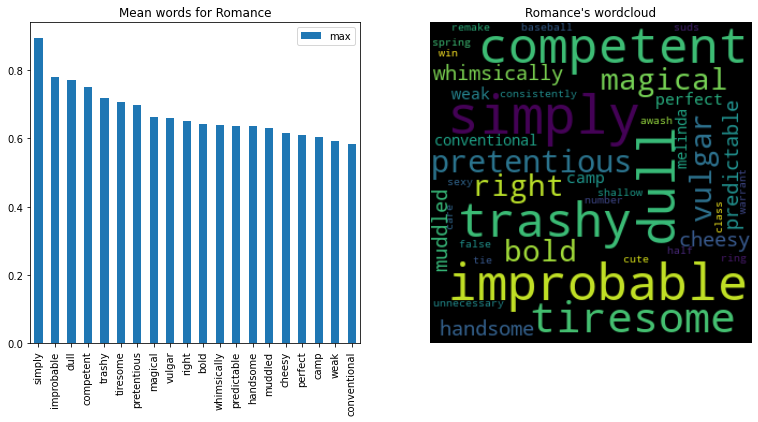

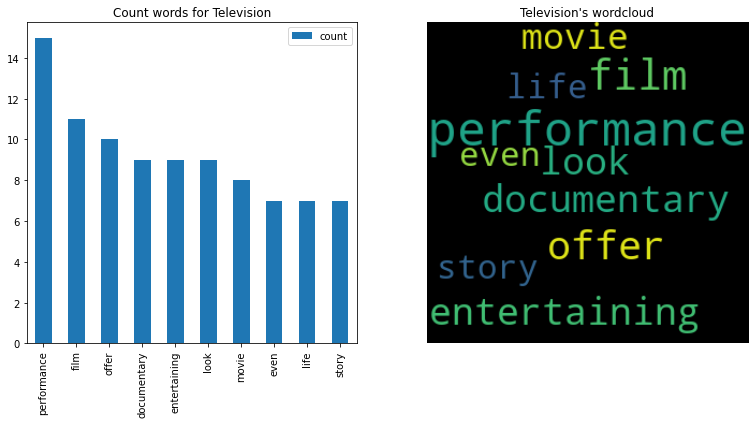

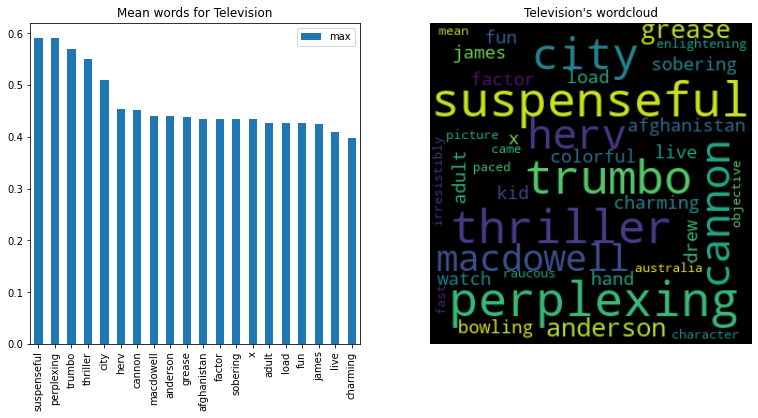

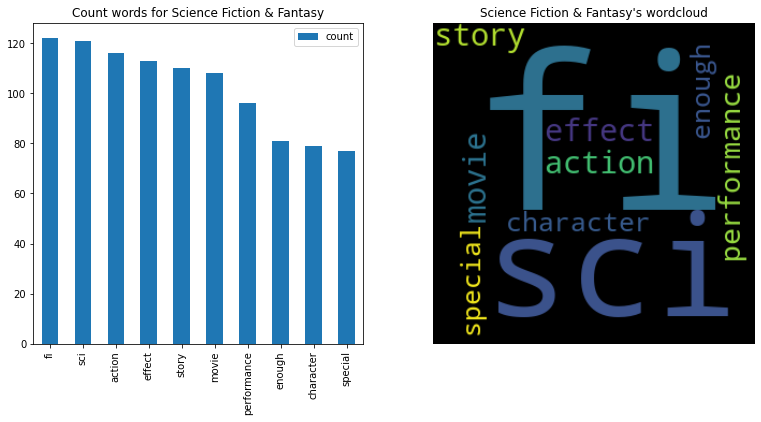

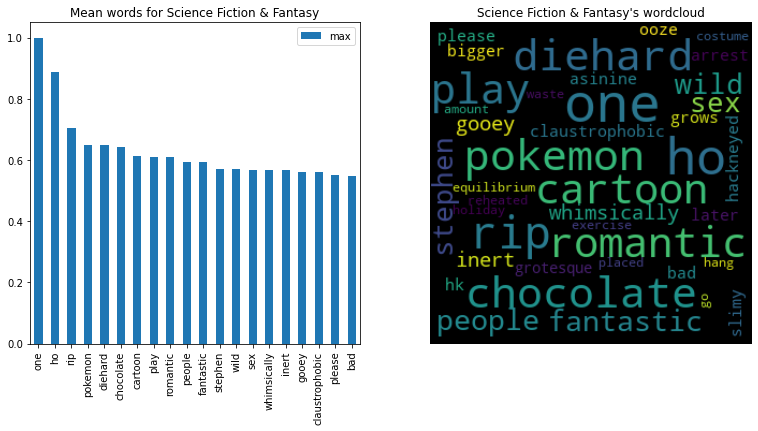

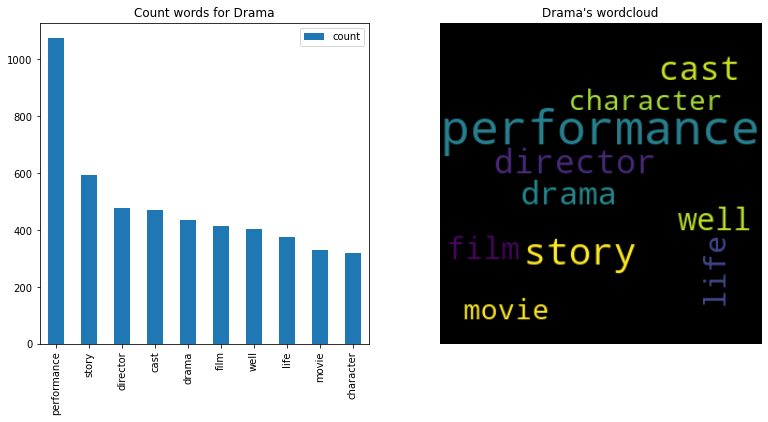

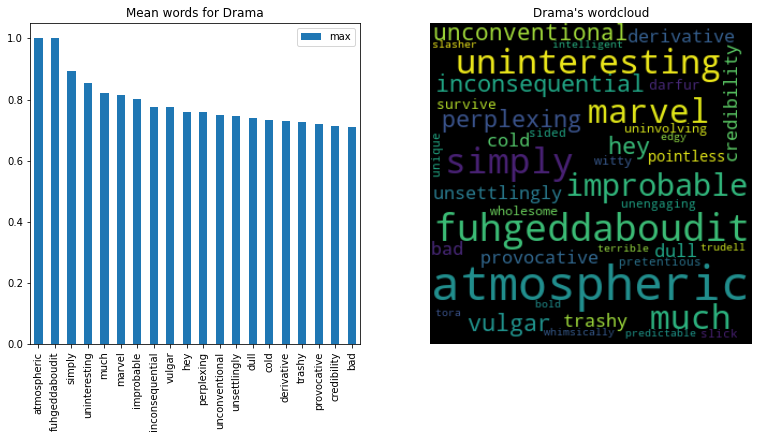

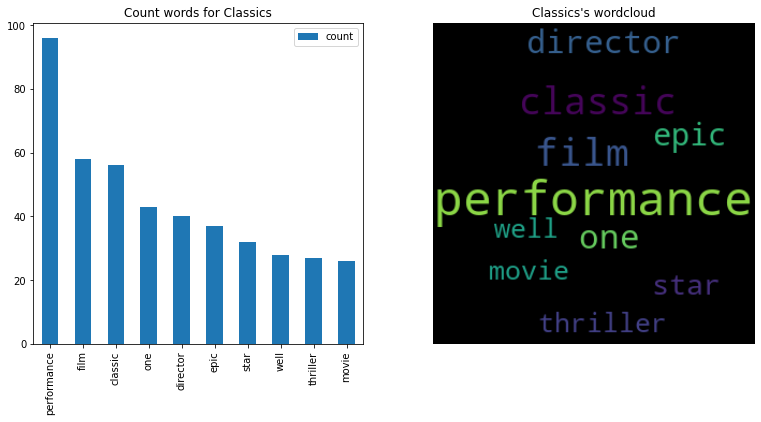

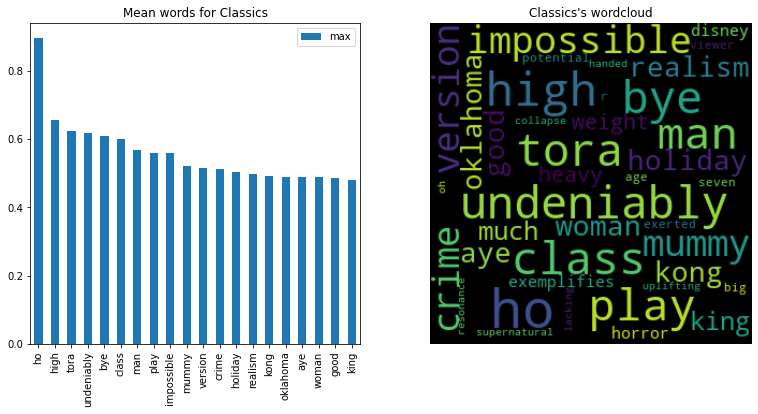

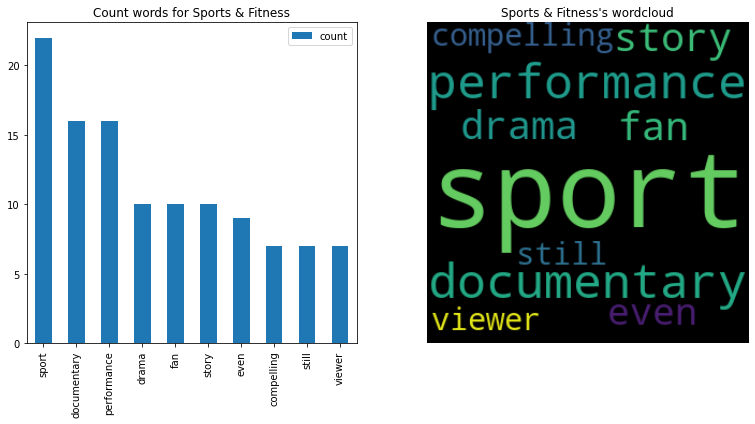

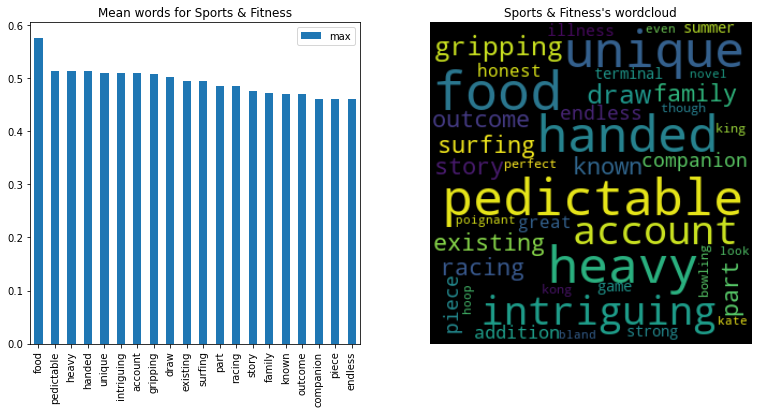

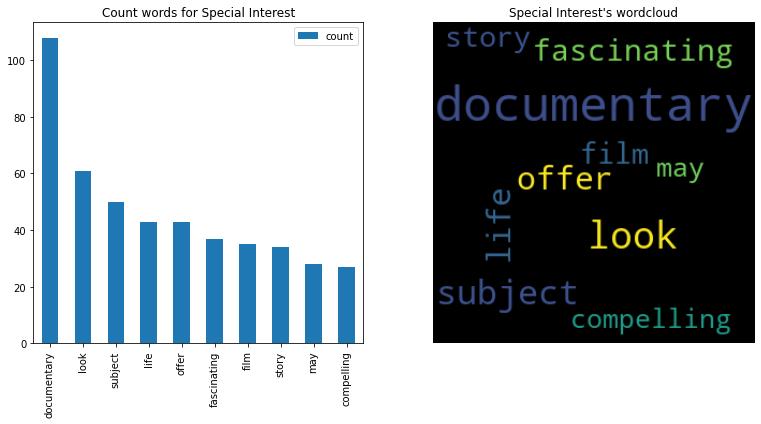

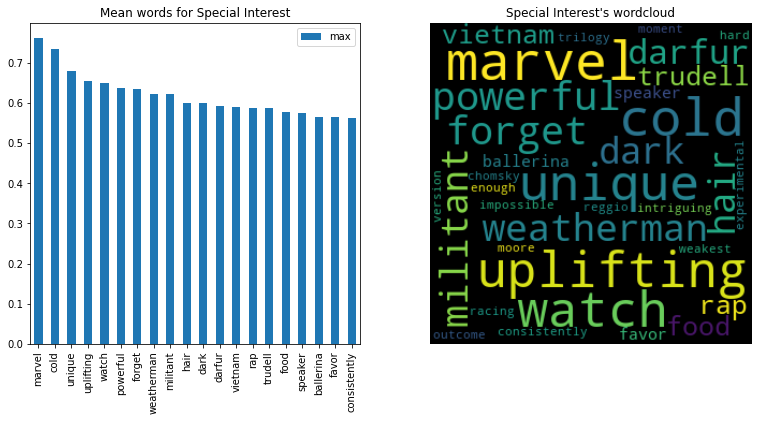

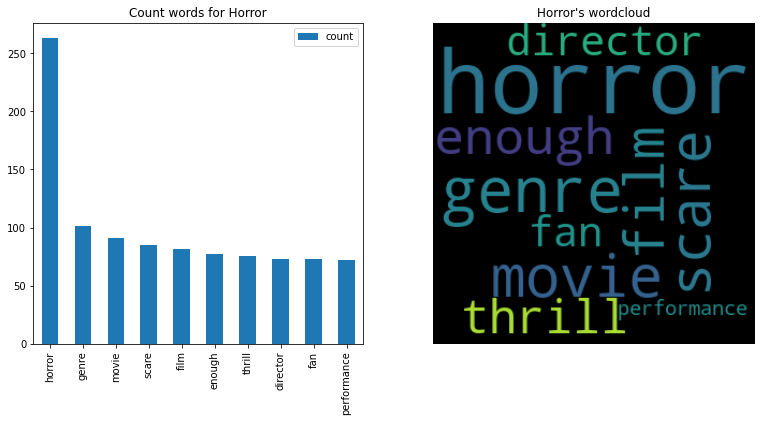

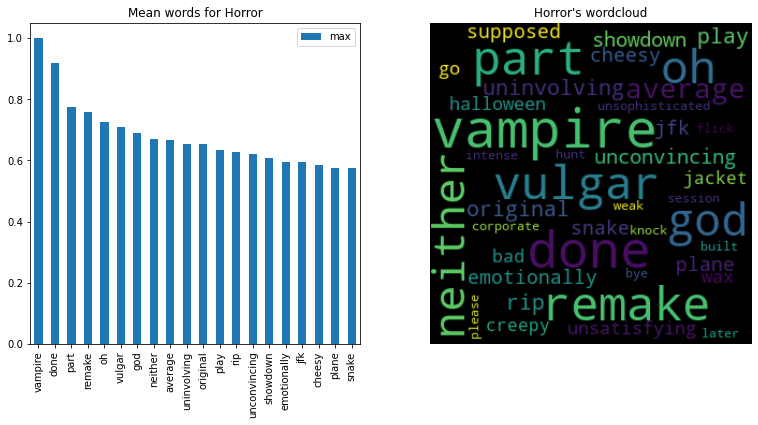

In [203]:
to_list = lambda string: string.split(", ") if type(string) == str else []

list_genres = set(movies[~movies["genres"].isna()]["genres"].apply(to_list).sum())
df_movies_explodes = movies.explode(["genres"])
for genre in list_genres:
    X = df_movies_explodes[(~df_movies_explodes["X_lem"].isna()) & (df_movies_explodes["genres"].str.contains(genre))]["X_lem"].apply(lambda wlist: " ".join(wlist))
    get_count(X, genre, 10)
    get_tfidf(X, genre)

# Use confusion matrix and models


I just write this code to do some tests
First I get the general list but I will focus on movies with status "rotten" or not

In [383]:

X = movies[(~movies["X_lem"].isna())]["X_lem"].apply(lambda wlist: " ".join(wlist))
vectorizer = CountVectorizer(stop_words=stop_words )
text_matrix = vectorizer.fit_transform(X)

df_matrix_gen = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
#pd.DataFrame(df_matrix_gen.sum().sort_values(ascending=False), columns = ["count"])

In [382]:
X = movies[(~movies["X_lem"].isna()) & (movies['tomatometer_status'] != "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))
vectorizer = CountVectorizer(stop_words= stop_words )
text_matrix = vectorizer.fit_transform(X)

df_matrix_pos = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
pd.DataFrame(df_matrix_pos.sum().sort_values(ascending=False), columns = ["count"])

count
performance   1048
director       538
story          525
well           424
film           417
...            ...
institution      1
instantly        1
insomnia         1
insidious        1
östlund          1

[12491 rows x 1 columns]

The following table is a list of words specific to "rotten" movies


In [381]:
X = movies[(~movies["X_lem"].isna()) & (movies['tomatometer_status'] == "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))
vectorizer = CountVectorizer(stop_words= stop_words )
text_matrix = vectorizer.fit_transform(X)


df_matrix_neg = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
pd.DataFrame(df_matrix_neg.sum().sort_values(ascending=False), columns = ["count"])

count
movie          389
story          368
cast           341
performance    305
enough         295
...            ...
immortal         1
immigrant        1
immense          1
immediate        1
zwigoff          1

[9293 rows x 1 columns]

In [433]:
quantile = df_matrix_gen.sum().quantile(.99)

I created a formula to compare the frequency of the word in rotten vs not rotten movies in a table base on general.

In [459]:
word_freq = pd.concat([df_matrix_pos.sum(), df_matrix_neg.sum(), df_matrix_gen.sum()], axis=1)
word_freq.columns = ["Fresh", "Rotten", "General"]
word_freq["freq_fresh"] = (word_freq["Fresh"] / word_freq["General"].sum())*100
word_freq["freq_rot"] = (word_freq["Rotten"] / word_freq["General"].sum())*100
word_freq["rel_fresh"] = (word_freq["Fresh"] / word_freq["Fresh"].sum())*100
word_freq["rel_rot"] = (word_freq["Rotten"] / word_freq["Rotten"].sum())*100
word_freq=word_freq.fillna(0)

In [451]:
word_freq["General"].sum()

131495

In [452]:
word_freq["Fresh"].sum()

81463.0

In [464]:
word_freq.describe()

Fresh        Rotten       General    freq_fresh      freq_rot  \
count  15862.000000  15862.000000  15862.000000  15862.000000  15862.000000   
mean       5.135733      3.154205      8.289938      0.003906      0.002399   
std       20.028126     12.507371     30.782252      0.015231      0.009512   
min        0.000000      0.000000      1.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000760      0.000000   
50%        1.000000      1.000000      2.000000      0.000760      0.000760   
75%        3.000000      2.000000      5.000000      0.002281      0.001521   
max     1048.000000    389.000000   1353.000000      0.796988      0.295829   

          rel_fresh       rel_rot  
count  15862.000000  15862.000000  
mean       0.006304      0.006304  
std        0.024586      0.024999  
min        0.000000      0.000000  
25%        0.001228      0.000000  
50%        0.001228      0.001999  
75%        0.003683      0.003997  
max        1.286474      0.777502

Then I assign a flag for film rotten or not to compare the 2 lists of movies rotten or not

In [366]:
df_matrix_neg["is_rotten"] = 1
df_matrix_neg.shape

(7565, 11)

In [367]:
df_matrix_pos["is_rotten"] = 0
df_matrix_pos.shape

(10147, 11)

In [368]:
 df_matrix_neg.shape[0] + df_matrix_pos.shape[0]

17712

In [369]:
df_matrix_pos_neg["is_rotten"].value_counts()

0.0    10147
1.0     7565
Name: is_rotten, dtype: int64

In [370]:
df_matrix_pos_neg = pd.concat([df_matrix_pos["is_rotten"], df_matrix_neg], ignore_index=True).fillna(0)
df_matrix_pos_neg.drop(0, axis=1, inplace=True)

In [276]:
#df_matrix_pos_neg.info()

I use what we see about the quest of KNN to create a model of prediction based on the content of the words

I also created method to test different models and results

In [277]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [371]:
y = df_matrix_pos_neg["is_rotten"].apply(lambda x : "Rotten" if x == 0 else "Not rotten")
X = df_matrix_pos_neg.loc[:, ~df_matrix_pos_neg.columns.str.contains("is_rotten")]

#X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state = 55)

#pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model_valence.predict(X_test)),
 #           index = model_valence.classes_ + " ACTUAL",
  #         columns = model_valence.classes_ + " PREDICTED")



In [372]:
model_valence = KNeighborsClassifier(n_neighbors=2, weights="distance")
model_valence.fit(X_train, y_train)
print("train's score:",model_valence.score(X_train, y_train))
print("test's score:",model_valence.score(X_test, y_test))

train's score: 0.6610207768744354
test's score: 0.6587624209575429


In [373]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model_valence.predict(X_test)),
            index = model_valence.classes_ + " ACTUAL",
            columns = model_valence.classes_ + " PREDICTED")


Not rotten PREDICTED  Rotten PREDICTED
Not rotten ACTUAL                   363              1511
Rotten ACTUAL                         0              2554

In [295]:
#my_data = 
#print(model_valence.predict(my_data))

In [296]:
#for i in range(2,11):
 #   print("\n")
  #  for w in ["uniform", "distance"]:
   #     model_valence = KNeighborsClassifier(n_neighbors=i, weights=w)
    #    model_valence.fit(X_train, y_train)
     #   print( "i :", i, "weight :", w)
      #  print("train's score:",model_valence.score(X_train, y_train))
       # print("test's score:",model_valence.score(X_test, y_test))
        #print(classification_report(y_test, model_valence.predict(X_test)))